<p style="color:red";>
<b><i></i>DRAFT - 01/01/2025 DO NOT USED</i></b>
<color=''>
    
[![Le Baladin](https://img.shields.io/badge/Le_baladin-\(1036\)_Ganymed-blue.svg)](https://github.com/dtouzan/ciboulette/tree/main/sector)

_Dominique Touzan_<sup>1,2</sup><br>
Notebook<sup>1</sup>: https://github.com/dtouzan/Jupyter/blob/master/1036_Ganymed.ipynb<br>
Correspondance<sup>2</sup>: [dtouzan@gmail.com](mailto:dtouzan@gmail.com)<br>

> **Résumé**: L'astéroïde (1036) Ganymed passait une bonne partie de l'été 2024 dans la constellation du Cygne, une des<br>
constellation du triangle d'été bien observable. L'Observation avec le _samyang 85mm F1.4_ (ouvert à F2.8) et la camera<br>
_RPICam IMX 477_ était réalisable, le temps de prise de vue par soirée ne dépassait pas trente minutes ce qui permettait<br>
de faire si possible une observation d'un autre objet du ciel profond aux alentours de la cible.<br><br> 
Une des particularité de la RPICam IMX 477 c'est qu'elle ne revient pas cher à fabriquer si toutefois on possède déjà une<br>
imprimante 3D. Elle se compose du CMOS, du boitier 3D, du Raspberry Pi4 ou Pi0 2w, d'une plaque anti-tilt T2, d'une<br>
entretoise T2/M28 et d'un filtre _(UV/IR-cut ou clear)_ astronomique.<br>

> **Mots-clés**: _Astéroïde, constellation, IMX 477, Filtres_.

## 1. Trajectoire dans la constellation du Cygne.
#### 1.1 Chargement des modules.

In [15]:
from matplotlib import pyplot as plt
from ciboulette.sector.maps import Map
from astropy.io import fits
from astropy import wcs as WCS

#### 1.2 Projection de la trajectoire.

simbad.query_criteria("region(circle, 307.5 +45.0, 17.166666666666668d) & (otype in (*)) & (Vmag<=6 | Bmag<=6 | Gmag<=6)")
simbad.query_criteria("region(circle, 307.5 +45.0, 17.166666666666668d) & (otype in ('OpC','As*')) & (Vmag<=8 | Bmag<=8 | Gmag<=8)")


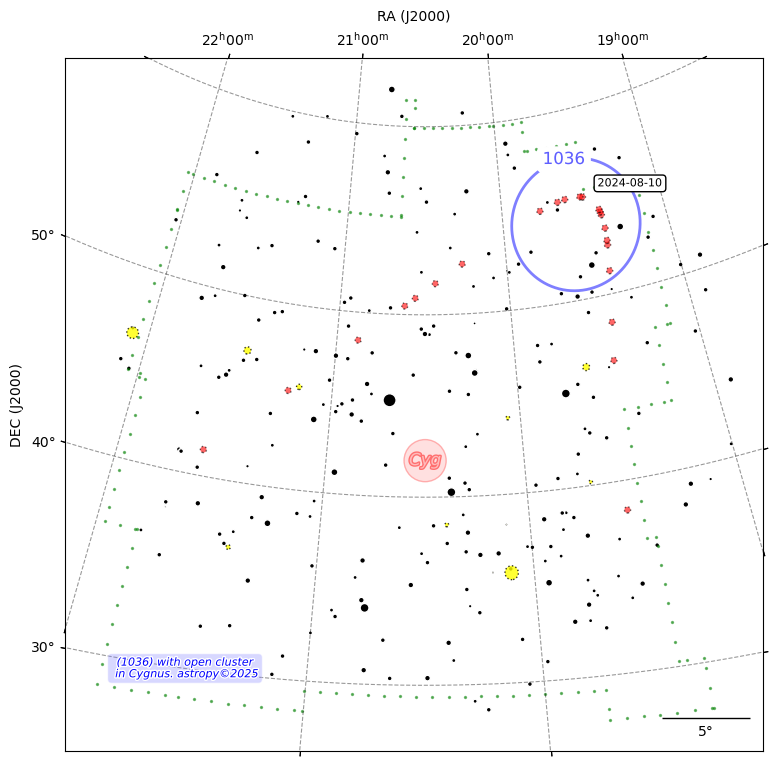

In [16]:
# Create map (imx477 and Samyang 85mm data)
MyMap = Map()
data_wcs = {'RA': 20.50, 'DEC': 45, 'naxis1': 4000, 'naxis2': 3000, 'binXY': 1, 'pixelXY': 7, 'focal': 35, 'projection': 'TAN'}
MyMap.new(data_wcs)

# Read stars Simbad CDS, light = magnitude 6
MyMap.light
MyMap.stars()

# Create markers
data = [['2024-06-28T21:47:00', '1036-20240628-2147-15x60s-f100.fits', 293.0808333333333, 38.41277777777778, 70, 1200, 4000],
        ['2024-07-14T21:43:00', '1036-20240714-2143-11x180s-f85.fits', 292.0804166666666, 46.46, 53, 4000, 8000],
        ['2024-07-19T21:52:00', '1036-20240719-2152-24x60s-f200.fits', 291.63875, 48.50222222222222, 170, 2500, 8000],
        ['2024-07-27T21:12:00', '1036-20240727-2112-9x180s-f85.fits', 290.9954166666666, 51.22861111111111, 53, 4000, 8000],
        ['2024-08-01T21:03:00', '1036-20240801-2103-9x60s-f85.fits', 290.72333333333336, 52.595, 53, 1500, 5000],
        ['2024-08-02T20:56:00', '1036-20240802-2056-18x60s-f85.fits', 290.6895833333333, 52.83555555555556, 53, 1800, 5000],
        ['2024-08-05T20:43:00', '1036-20240805-2043-30x60s-f85.fits', 290.63958333333335, 53.49388888888889, 53, 1500, 5000],
        ['2024-08-09T20:42:00', '1036-20240809-2042-30x60s-f85.fits', 290.72041666666667, 54.22583333333333, 53, 1000, 4000],
        ['2024-08-10T20:43:00', '1036-20240810-2043-29x60s-f85.fits', 290.77166666666665, 54.3825, 53, 1000, 4000],
        ['2024-08-11T20:42:00', '1036-20240811-2042-33x60s-f85.fits', 290.83624999999995, 54.52833333333333, 53, 800, 4000],
        ['2024-08-20T20:49:00', '1036-20240820-2049-25x60s-f85.fits', 292.13083333333327, 55.37111111111111, 53, 2000, 6500],
        ['2024-08-21T20:39:00', '1036-20240821-2039-30x60s-f85.fits', 292.3620833333333, 55.41111111111111, 53, 1800, 6500],
        ['2024-08-26T20:34:00', '1036-20240826-2034-30x60s-f85.fits', 293.8320833333333, 55.44277777777778, 53,800, 5000],
        ['2024-08-28T19:56:00', '1036-20240828-1956-50x60s-f85.fits', 294.56291666666664, 55.37277777777778, 53, 1000, 6000],
        ['2024-09-01T20:23:00', '1036-20240901-2023-6x60s-f85.fits', 296.3374999999999, 55.07444444444445, 53, 800, 6000],
        ['2024-09-13T19:44:00', '1036-20240913-1944-5x60s-f120.fits', 304.06999999999994, 52.70861111111111, 80, 1500, 8000],
        ['2024-09-16T19:27:00', '1036-20240916-1927-30x60s-f120.fits', 306.5741666666666, 51.69416666666666, 80, 5000, 12000],
        ['2024-09-18T19:39:00', '1036-20240918-1939-87x60s-f120.fits', 308.3758333333333, 50.89722222222222, 80, 13000, 20000],
        ['2024-09-19T19:27:00', '1036-20240919-1927-69x60s-f120.fits', 309.29875, 50.46694444444444, 80, 6000, 12000],
        ['2024-09-23T18:55:00', '1036-20240923-1855-24x60s-f120.fits', 313.2025, 48.47722222222222, 80, 1500, 8000],
        ['2024-09-28T18:50:00', '1036-20240928-1850-63x60s-f120.fits', 318.4887499999999, 45.32666666666667, 80, 1500, 8000],
        ['2024-10-03T18:37:00', '1036-20241003-1837-55x60s-f120.fits', 324.05541666666664, 41.40527777777778, 80, 1500, 8000]]

for line in data:
    data_base = {'ra': line[2]/15, 'dec': line[3], 'angle': 20, 'main_id': line[0]}
    style = {'color': 'red', 'size': 1, 'alpha': 0.6}
    MyMap.marker(data_base, style)

# Read DSO open cluster
MyMap.magnitude = 8
style = {'color': 'yellow', 'size': 1, 'alpha': 0.8}
MyMap.opencluster(style)

# Create constellation
dataset = {'title': 'CYG'}
style = {'color': 'green', 'size': 1, 'alpha': 0.5}
MyMap.constellations(dataset, style)

# Create label date 
dataset = {'ra': 19+(10/60), 'dec': data[11][3], 'angle': 0, 'main_id': "2024-08-10"}
style = {'color': 'black', 'size': 8, 'angle': 0, 'alpha':1}
MyMap.date(dataset, style)

# Create label red pin 
dataset = {'ra': 20+(30/60), 'dec': 42, 'angle': 0, 'main_id': "Cyg"}
style = {'color': 'black', 'size': 12, 'angle': 0, 'alpha':0.5}
MyMap.red(dataset, style)

# Create label information
dataset = {'ra': 21+(30/60), 'dec': 30, 'angle': 0, 'main_id': "(1036) with open cluster\n in Cygnus. astropy©2025"}
MyMap.i(dataset)

# Create label blue pin 
dataset = {'ra': 19+(33/60), 'dec': 54, 'angle': 420, 'main_id': "1036"}
MyMap.blue(dataset, style)

# Plot map and save PNG format 
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection=MyMap.WCS)
MyMap.plot(ax)
MyMap.J2000(ax)
MyMap.degree(ax,5)
plt.savefig('Ganymed.png')
plt.show()

<div class="alert alert-block alert-info">
<b><i>i</i> :</b> Cette projection repésente la trajetoire de Ganymed dans la constellation du <b>Cygne</b> entre fin juin et début octobre.<br>
Les limites de la constellation sont indiquées en pointilllés vert. Les marqueurs rouge le déplacement de (1036) Ganymed.
</div>

<div class="alert alert-block alert-warning">
<b><i>Optional</i>:</b> plt.savefig('Ganymed.png').
</div>

## 2. Déplacements 


## 3. L'amas NGC 7039

#### 3.1 Carte du secteur

simbad.query_region(SkyCoord(ra=318.0, dec=45.3, unit=(u.deg, u.deg), frame='icrs'), width=Angle(2.019607843137255, 'deg'),  height=Angle(2.019607843137255, 'deg'), catalog=I/350/gaiaedr3, column_filters={'Gmag': '<=14'})
simbad.query_criteria("region(circle, 318.0 +45.3, 1.0098039215686274d) & (otype in ('OpC','As*')) & (Vmag<=14 | Bmag<=14 | Gmag<=14)")
2024-09-28T18:50:00


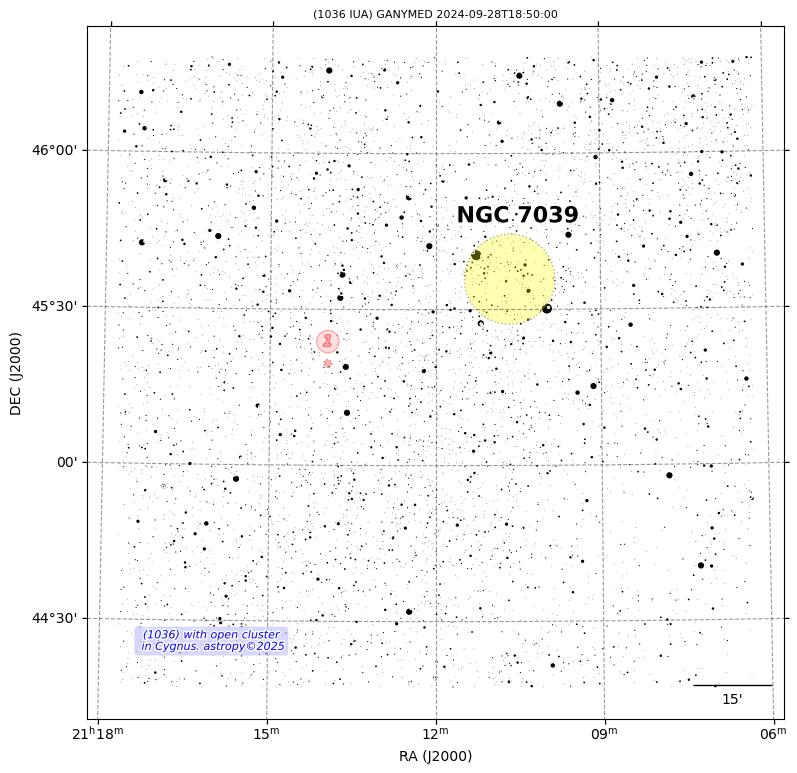

In [17]:
# Create map (imx477 and Samyang 85mm data)
data_wcs = {'RA': 21.20, 'DEC': 45.30, 'naxis1': 4000, 'naxis2': 3000, 'binXY': 1, 'pixelXY': 1.55, 'focal': 85, 'projection': 'TAN'}
MyMap.new(data_wcs)

# Read Gaia edr3
MyMap.gaiaedr3()

# Read DSO
MyMap.medium
MyMap.opencluster()

# Read Ganymed data
for line in data:
    if MyMap.into({'ra': line[2], 'dec': line[3]}):
        print(line[0])
        data_base = {'ra': line[2]/15, 'dec': line[3], 'angle': 1.5, 'main_id': line[0]}
        style = {'color': 'red', 'size': 1, 'alpha': 0.3}
        MyMap.marker(data_base, style)
        # Create label red pin
        dataset = {'ra': line[2]/15, 'dec': line[3]+0.07, 'angle': 0, 'main_id': "1"}
        style = {'color': 'black', 'size': 10, 'angle': 0, 'alpha':0.5}
        MyMap.red(dataset, style)

# Create label
dataset = {'ra': 21+(10.5/60), 'dec': 45.80, 'angle': 0, 'main_id': "NGC 7039"}
style = {'color': 'black', 'size': 16, 'angle': 0, 'alpha':1}
MyMap.LABEL(dataset, style)

# Create label information
dataset = {'ra': 21+(16/60), 'dec': 44+(26/60), 'angle': 0, 'main_id': "(1036) with open cluster\n in Cygnus. astropy©2025"}
style = {'color': 'black', 'size': 8, 'angle': 0, 'alpha':1}
MyMap.i(dataset, style)

# Plot
fig = plt.figure(figsize=(9,9), dpi=100)
ax = fig.add_subplot(111, projection=MyMap.WCS)
MyMap.title = '(1036 IUA) GANYMED ' + data_base['main_id']
MyMap.plot(ax)
MyMap.J2000(ax)
MyMap.minutes(ax,15)
MyMap.titlemap(ax)
plt.show()

<div class="alert alert-block alert-info">
<b><i>i</i> :</b> (1) astéroïde (1036) Ganymed le 28 septembre 2024 à 18:50 heures.
</div>

#### 3.2 Image IMX477

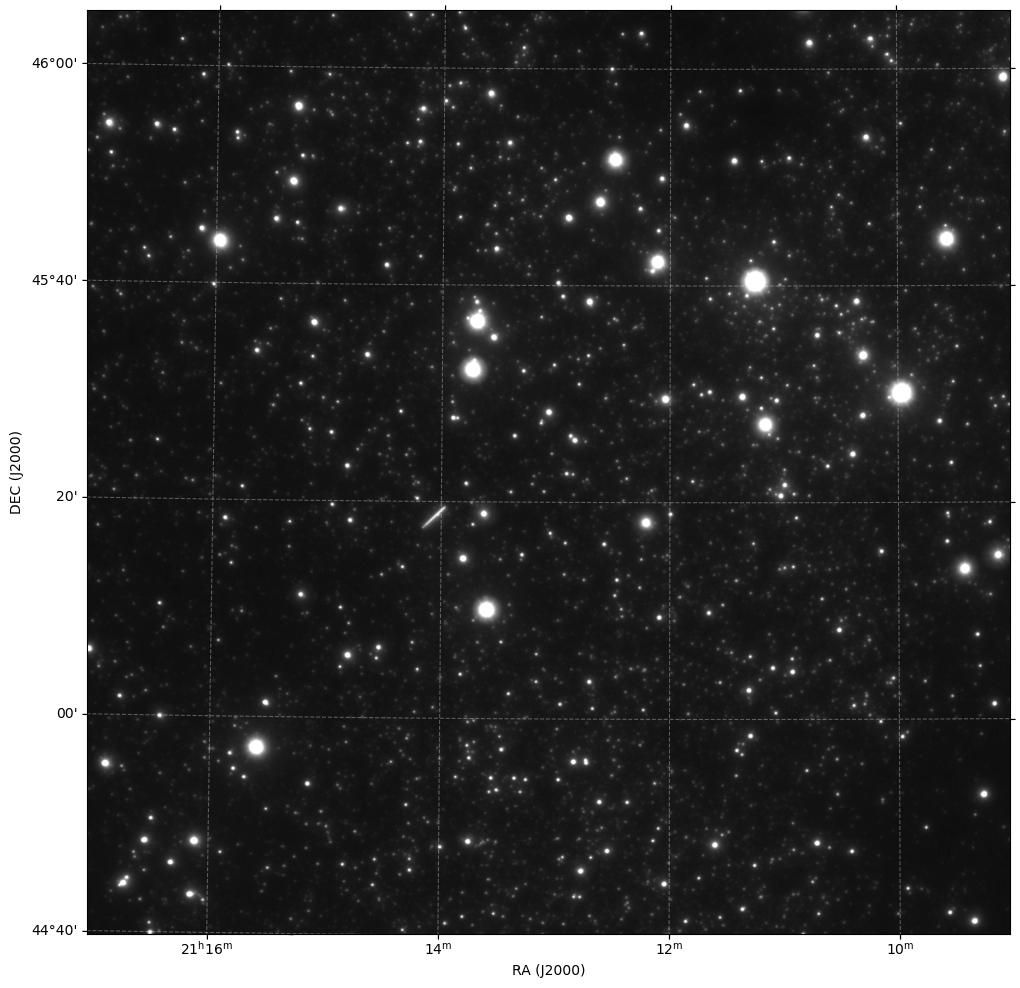

In [5]:
file = 'ngc7039-20240928-1850-63x60s-f120.fits'
data, hdr = fits.getdata(file, header=True)
# Redéfinition de RADECSYS en RADESYSA pour 'ICRS' : the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
hdr['RADESYSa'] = hdr['RADECSYS']
del hdr['RADECSYS']
wcs = WCS.WCS(hdr)  # Création du WCS à partir de l'entête
fig = plt.figure(figsize=(12,12))
plt.subplot(projection=wcs.celestial) # Transformation du WCS en 2 dimension
plt.imshow(data[0], cmap='gray', vmin=10 , vmax=120, origin='lower') 
plt.grid(color='white', ls='--', alpha=0.3)
plt.xlabel('RA (J2000)')
plt.ylabel('DEC (J2000)')
plt.show()

<div class="alert alert-block alert-info">
<b><i>i</i> :</b> Suivi de l'astéroïde (1036) Ganymed le 28 septembre 2024, le tracé represente 63 minutes de 18:50 heures à 19:53 heures avec un objectif d'une focale de 85mm ouvert à F2.8.
</div>

>Le baladin©2024
><br>
><br>
>**Références**:<br>
[3Dimx:](https://github.com/dtouzan/3Dimx) RPICam IMX 477<br>
[Code:](https://github.com/dtouzan/ciboulette/tree/main/sector) Ciboulette.sector.maps<br>
<br>
<br>
[![astropy](http://img.shields.io/badge/powered%20by-AstroPy-orange.svg?style=flat)](http://www.astropy.org/)
[![JupyterLab](http://img.shields.io/badge/powered%20by-JupyterLab-orange.svg?style=flat)](https://jupyter.org/)
[![Siril](http://img.shields.io/badge/Software-Siril_software-orange.svg?style=flat)](https://siril.org/)
[![cds](http://img.shields.io/badge/CDS-Database-green.svg?style=flat)](http://cdsportal.u-strasbg.fr/)
<br>
<br>